In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Мы будем работать с данными агрегатора такси [Sigma Cabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). В зависимости от характеристик поездки требуется предсказать один из трех типов повышенного ценообразования: [1, 2, 3]. Таким образом, это поможет компании оптимально мэтчить такси и клиентов. 

In [141]:
df = pd.read_csv('sigma_cabs.csv')
df.shape

(131662, 14)

In [142]:
# Занесем индекс колонку
df = df.set_index('Trip_ID')
df.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
Trip_ID,,,,,,,,,,,,,
T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


Описание признаков:

1. **Trip_ID**: ID for TRIP
2. **Trip_Distance**: The distance for the trip requested by the customer
3. **TypeofCab**: Category of the cab requested by the customer
4. **CustomerSinceMonths**: Customer using cab services since n months; 0 month means current month
5. **LifeStyleIndex**: Proprietary index created by Sigma Cabs showing lifestyle of the customer based on their behaviour
6. **ConfidenceLifeStyle_Index**: Category showing confidence on the index mentioned above
7. **Destination_Type**: Sigma Cabs divides any destination in one of the 14 categories.
8. **Customer_Rating**: Average of life time ratings of the customer till date
9. **CancellationLast1Month**: Number of trips cancelled by the customer in last 1 month
10. **Var1**, **Var2** and **Var3**: Continuous variables masked by the company. Can be used for modelling purposes
11. **Gender**: Gender of the customer

**SurgePricingType**: Target (can be of 3 types)


### EDA 
Заполните пропуски в вещественных признаках медианой, а в категориальных - самым популярным классом. Изобразите марицу корреляций и выведите топ5 пар самых коррелированных признаков.

Так как в сумме уникальных значений различных категориальных признаков окажется не супер-много, примените `One-Hot-Encoding` для них. Не забудьте в методе `pd.get_dummies` указать параметр `drop_first=True`.

In [143]:
### Your code is here
numeric_columns = df.loc[:,df.dtypes!=np.object].columns
df.loc[:,df.dtypes!=np.object].head(2)
categorical_columns = df.loc[:,df.dtypes==np.object].columns
df.loc[:,df.dtypes==np.object].head(2)
numeric_columns, categorical_columns

(Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
        'Customer_Rating', 'Cancellation_Last_1Month', 'Var1', 'Var2', 'Var3',
        'Surge_Pricing_Type'],
       dtype='object'),
 Index(['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type',
        'Gender'],
       dtype='object'))

In [144]:
numeric_columns = numeric_columns[:-1]

In [145]:
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())

In [146]:
for col in categorical_columns:
    popular_category = df[col].value_counts().index[0]
    df[col] = df[col].fillna(popular_category)

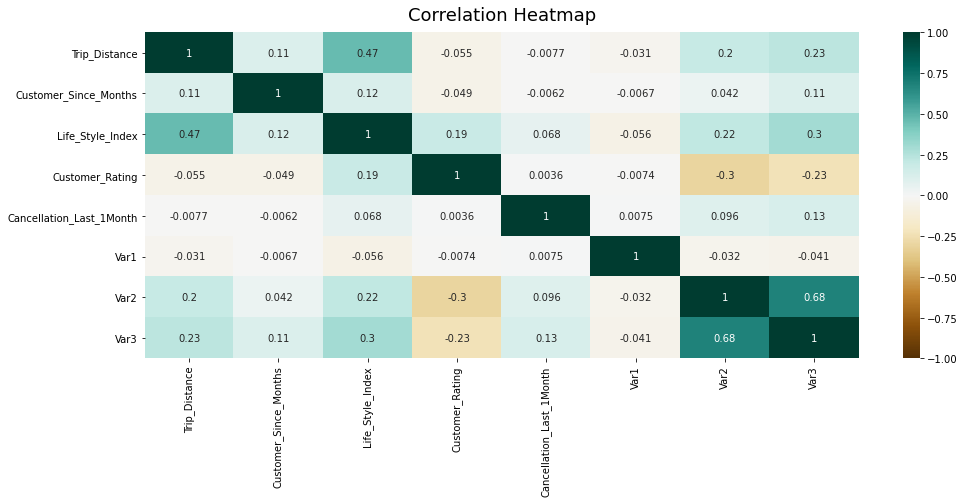

In [147]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[numeric_columns].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12); 

In [183]:
corr_mat = df[numeric_columns].corr()
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
unique_corr_pairs = upper_corr_mat.unstack().dropna()
# Sort correlation pairs
sorted_mat = unique_corr_pairs.sort_values(ascending=False, key=abs)
sorted_mat

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3
Trip_Distance,NaN,0.11434,0.468367,-0.054654,-0.007686,-0.030662,0.200456,0.231706
Customer_Since_Months,NaN,NaN,0.119154,-0.049001,-0.006187,-0.006700,0.041766,0.110830
Life_Style_Index,NaN,NaN,NaN,0.189173,0.068176,-0.055873,0.215921,0.303296
Customer_Rating,NaN,NaN,NaN,NaN,0.003595,-0.007400,-0.302968,-0.227531
Cancellation_Last_1Month,NaN,NaN,NaN,NaN,NaN,0.007550,0.095830,0.128686
Var1,NaN,NaN,NaN,NaN,NaN,NaN,-0.031712,-0.041235
Var2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.683437
Var3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
### Секретные функции для фильтрации признаков

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 5))

Top Absolute Correlations
Var2              Var3                0.683437
Trip_Distance     Life_Style_Index    0.468367
Life_Style_Index  Var3                0.303296
Customer_Rating   Var2                0.302968
Trip_Distance     Var3                0.231706
dtype: float64


In [150]:
for col in categorical_columns:
    one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)

In [151]:
X = df.drop(columns=['Surge_Pricing_Type'])
y = df['Surge_Pricing_Type']

In [152]:
X.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
Trip_ID,,,,,,,,,,,,,,,,,,,,,
T0005689460,6.77,1.0,2.427690,3.90500,0,40.000000,46,60,1,0,...,0,0,0,0,0,0,0,0,0,0
T0005689461,29.47,10.0,2.782450,3.45000,0,38.000000,56,78,1,0,...,0,0,0,0,0,0,0,0,0,1
T0005689464,41.58,10.0,2.802064,3.50125,2,64.202698,56,77,1,0,...,0,0,0,0,0,0,0,0,0,1
T0005689465,61.56,10.0,2.802064,3.45375,0,64.202698,52,74,0,1,...,0,0,0,0,0,0,0,0,0,1
T0005689467,54.95,10.0,3.034530,3.40250,4,51.000000,49,102,0,1,...,0,0,0,0,0,0,0,0,0,1


### Training

In [153]:
np.random.seed(2022)

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

**Задание 1.** Обучите One-vs-Rest Logreg. Не забудьте в шаг добавить стандартизацию данных (через `StandardScaler`) Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg. Здесь и далее округляйте до 3 знака после запятой.

Чтобы отдельно и долго не вычислять метрики, можно воспользоваться `classification_report` из `sklearn.metrics`!

In [155]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

### Your code is here

pipe = Pipeline([("scaler", StandardScaler()),
                 ("one_vs_all", OneVsRestClassifier(LogisticRegression()))])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_all',
                 OneVsRestClassifier(estimator=LogisticRegression()))])

In [156]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pipe.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.722     0.542     0.619      5372
           2      0.636     0.835     0.722     11349
           3      0.741     0.571     0.645      9612

    accuracy                          0.679     26333
   macro avg      0.700     0.649     0.662     26333
weighted avg      0.692     0.679     0.673     26333



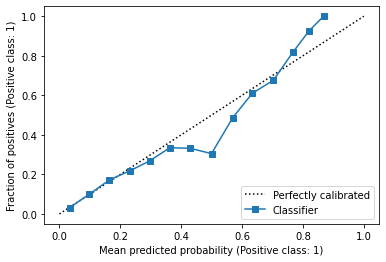

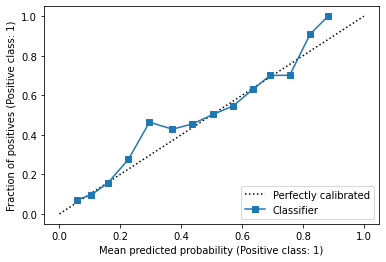

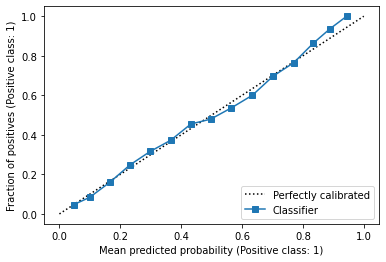

In [157]:
from sklearn.calibration import CalibrationDisplay

pred_prob = pipe.predict_proba(X_test)
shape0 = pred_prob.shape[0]
pred_cl1 = pred_prob[:,:1].reshape(shape0,)
true_cl1 = (y_test==1).astype(int)
pred_cl2 = pred_prob[:,1].reshape(shape0,)
true_cl2 = (y_test==2).astype(int)
pred_cl3 = pred_prob[:,2].reshape(shape0,)
true_cl3 = (y_test==3).astype(int)
CalibrationDisplay.from_predictions(true_cl1, pred_cl1 , n_bins=15)
CalibrationDisplay.from_predictions(true_cl2, pred_cl2 , n_bins=15)
CalibrationDisplay.from_predictions(true_cl3, pred_cl3 , n_bins=15)

Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()` из предложенных. Для лучшего набора гиперпараметров посчитайте те же самые метрики. Валидировать параметры необходимо по `accuracy`. В этот раз проведем настояющую процедуру Кросс-Валидации! 

Для этого в метод `fit` передадим тренировочную часть наших данных, в параметр `cv` ничего не будем передавать (по дефолту 5-fold Кросс-Валидация будет проведена), а итоговые метрики замерим на тесте!

In [158]:
param_grid = {'one_vs_all__estimator__penalty': ['l1', 'l2', 'elasticnet'],
              'one_vs_all__estimator__C': [0.001, 0.01, 0.1, 1]}

In [159]:
### Your code is here
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(pipe, param_grid)

search.fit(X_train, y_train)

print(f"Best parameter (CV score={search.best_score_:.5f}):")
print(search.best_params_)


Best parameter (CV score=0.68075):
{'one_vs_all__estimator__C': 0.001, 'one_vs_all__estimator__penalty': 'l2'}


In [160]:
pipe.set_params(one_vs_all__estimator__C = 0.001, one_vs_all__estimator__penalty='l2')
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_all',
                 OneVsRestClassifier(estimator=LogisticRegression(C=0.001)))])

In [161]:
print(classification_report(y_test, pipe.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.741     0.534     0.621      5372
           2      0.635     0.839     0.723     11349
           3      0.742     0.576     0.648      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.664     26333
weighted avg      0.696     0.681     0.675     26333



In [171]:
print(classification_report(y_test, search.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.741     0.534     0.621      5372
           2      0.635     0.839     0.723     11349
           3      0.742     0.576     0.648      9612

    accuracy                          0.681     26333
   macro avg      0.706     0.650     0.664     26333
weighted avg      0.696     0.681     0.675     26333



Изобразите три калибровочные кривые для Logistic Classifier: 0-vs-rest, 1-vs-rest, 2-vs-rest. Хорошо ли откалиброван обученный классификатор? 

Заметьте, что `predict_proba` возвращает список из вероятностей для всех наших классов!

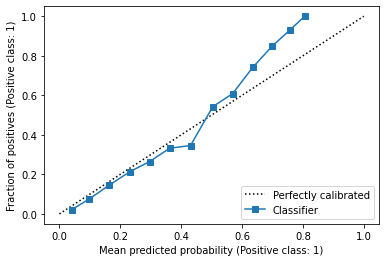

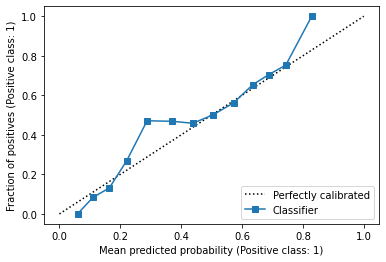

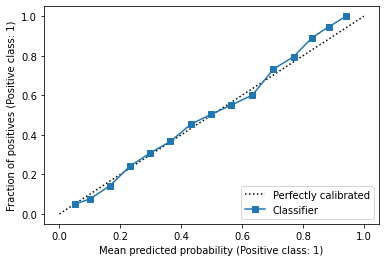

In [162]:
### Your code is here
pred_prob = pipe.predict_proba(X_test)
shape0 = pred_prob.shape[0]
pred_cl1 = pred_prob[:,:1].reshape(shape0,)
true_cl1 = (y_test==1).astype(int)
pred_cl2 = pred_prob[:,1].reshape(shape0,)
true_cl2 = (y_test==2).astype(int)
pred_cl3 = pred_prob[:,2].reshape(shape0,)
true_cl3 = (y_test==3).astype(int)
CalibrationDisplay.from_predictions(true_cl1, pred_cl1 , n_bins=15)
CalibrationDisplay.from_predictions(true_cl2, pred_cl2 , n_bins=15)
CalibrationDisplay.from_predictions(true_cl3, pred_cl3 , n_bins=15)


**Задание 2.** Обучите логистическую регрессию с гиперпараметрами из первого задания на полиномиальных признаках до 4 степени. Сравните метрики с первым заданием.


Пример: Пусть у нас был единственный признак 

$$
d_j = [1, 2, 3, 4]
$$

Тогда полиномиальные признаки до 4 степени от такого будут иметь вид:

$$
d_j^1 = [1, 2, 3, 4]
$$

$$
d_j^2 = [1, 4, 9, 16]
$$

$$
d_j^3 = [1, 8, 27, 64]
$$

$$
d_j^4 = [1, 16, 81, 256]
$$

P.S. Бинарные колонки нет смысла возводить в какие-то степени, поэтому возьмем исключительно вещественные из базовых. 

Для этого можно воспользоваться классическим циклом (или уроком из занятия про `Sberbank Housing Market`). Положите модифицированный датасет в переменную `X_polinomial`!

P.S.S Зачастую еще, создаваю полиномиальные фичи, учитывают "пересечения" признаков, то есть, например, из векторов признаков $d_j, d_i$ генерируют не просто новые степени $d_j^2, d_i^2, d_j^3, d_i^3...$, а еще и признаки вида $d_j \cdot d_i, d_j^2 \cdot d_i, d_j \cdot d_i^2...$, но здесь ограничьтесь просто степенями!

In [163]:
### Создание полиномиальных признаков

X_polinomial = X.copy()

for col in numeric_columns:
    for power in [2, 3, 4]:
        
        to_add = (X_polinomial[col]**power).to_frame().rename({col:f"{col}_{power}"}, axis=1)
        X_polinomial = pd.concat((X_polinomial, to_add), axis=1)

### Your code is here

In [164]:
X_pol_train, X_pol_test, y_train, y_test  = train_test_split(X_polinomial, y, 
                                                             test_size=0.2, 
                                                             shuffle=True, 
                                                             random_state=2022)

In [165]:
### Your code is here
pipe.fit(X_pol_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('one_vs_all',
                 OneVsRestClassifier(estimator=LogisticRegression(C=0.001)))])

In [166]:
print(classification_report(y_test, pipe.predict(X_pol_test), digits=3))

              precision    recall  f1-score   support

           1      0.748     0.532     0.622      5372
           2      0.636     0.837     0.723     11349
           3      0.741     0.585     0.653      9612

    accuracy                          0.683     26333
   macro avg      0.708     0.651     0.666     26333
weighted avg      0.697     0.683     0.677     26333



По аналогии с первым заданием изобразите три калибровочные кривые. Стало ли лучше?

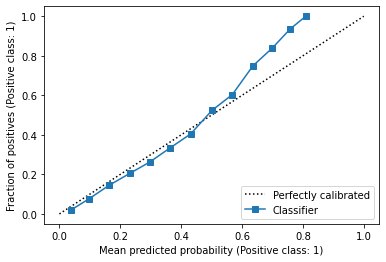

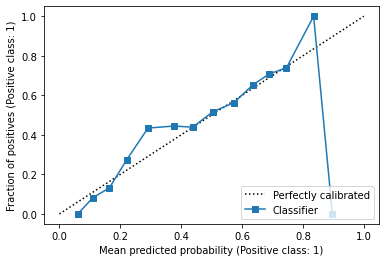

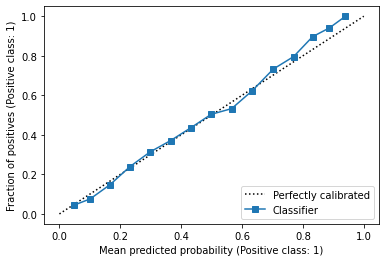

In [167]:
### Your code is here
### Your code is here
pred_prob = pipe.predict_proba(X_pol_test)
shape0 = pred_prob.shape[0]
pred_cl1 = pred_prob[:,:1].reshape(shape0,)
true_cl1 = (y_test==1).astype(int)
pred_cl2 = pred_prob[:,1].reshape(shape0,)
true_cl2 = (y_test==2).astype(int)
pred_cl3 = pred_prob[:,2].reshape(shape0,)
true_cl3 = (y_test==3).astype(int)
CalibrationDisplay.from_predictions(true_cl1, pred_cl1 , n_bins=15)
CalibrationDisplay.from_predictions(true_cl2, pred_cl2 , n_bins=15)
CalibrationDisplay.from_predictions(true_cl3, pred_cl3 , n_bins=15)



**Задание 3.** Обучите на датасете без полиномиальных признаков One-vs-One `SGDClassifier` из `sklearn.linear_model`, который использует стохастический градиентный спуск (узнаете о нем позже) и может обучать как `SVM`, так и, например, `LogReg`, если указать в качестве параметра `loss` либо `hinge`, либо `log` соответственно!

Посчитайте precision, recall, f1-score и усредните по всем классам с помощью micro, macro и weighted avg.

In [67]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, 
                                                     test_size=0.2, 
                                                     shuffle=True, 
                                                     random_state=2022)

In [170]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsOneClassifier

### Your code is here
pipe_all_all = Pipeline([("scaler", StandardScaler()),
                         ("all_vs_all", OneVsOneClassifier(SGDClassifier()))])

pipe_all_all.fit(X_train, y_train)
print(classification_report(y_test, pipe_all_all.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.738     0.523     0.612      5372
           2      0.625     0.872     0.728     11349
           3      0.761     0.530     0.625      9612

    accuracy                          0.676     26333
   macro avg      0.708     0.642     0.655     26333
weighted avg      0.698     0.676     0.667     26333



Подберите оптимальные гиперпараметры модели с помощью `GridSearchCV()`. При этом переберите всевозможные функции потерь. Таким образом, при `loss = 'hinge'`, мы обучим SVM, при `loss = 'log'` мы обучим логистическую регрессию и т.д.

Используйте прием с Кросс-Валидацией при подборе параметров, как ранее, а также замерьте метрики на тесте.

In [175]:
param_grid = {'all_vs_all__estimator__loss': ['hinge', 'log', 'modified_huber'],
              'all_vs_all__estimator__penalty': ['l1', 'l2'],
              'all_vs_all__estimator__alpha': [0.001, 0.01, 0.1]}

In [176]:
### Your code is here
search_all_all = GridSearchCV(pipe_all_all, param_grid)

search_all_all.fit(X_train, y_train)

print(f"Best parameter (CV score={search_all_all.best_score_:.5f}):")
print(search_all_all.best_params_)


Best parameter (CV score=0.68107):
{'all_vs_all__estimator__alpha': 0.1, 'all_vs_all__estimator__loss': 'modified_huber', 'all_vs_all__estimator__penalty': 'l2'}


In [177]:
print(classification_report(y_test, search_all_all.predict(X_test), digits=3))

              precision    recall  f1-score   support

           1      0.748     0.529     0.620      5372
           2      0.631     0.846     0.723     11349
           3      0.745     0.568     0.645      9612

    accuracy                          0.680     26333
   macro avg      0.708     0.648     0.662     26333
weighted avg      0.697     0.680     0.673     26333



Можно ли однозначной сказать, какой подход оказался лучше: One-vs-Rest или One-vs-One?